In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [2]:
# Set random seeds for reproducibility across the entire script
import random
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)


In [3]:
data = pd.read_csv('/content/spammailsTF.csv')

In [4]:
# Split data into features and labels
X = data['text']
y = data['label_num']

# Split the data into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Tokenize the text
tokenizer = Tokenizer(num_words=10000)  # Use the top 10,000 words
tokenizer.fit_on_texts(X_train)

# Convert the texts to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to ensure all sequences have the same length
max_sequence_length = 100  # Define a max sequence length
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length, padding='post')

# Use SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_pad, y_train)


In [5]:
# Define the model architecture
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_sequence_length),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [6]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Train the model
history = model.fit(X_train_resampled, y_train_resampled, epochs=5, batch_size=32, validation_data=(X_test_pad, y_test))


Epoch 1/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 56s 322ms/step - accuracy: 0.5768 - loss: 0.6603 - val_accuracy: 0.6166 - val_loss: 0.4670
Epoch 2/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 81s 319ms/step - accuracy: 0.8188 - loss: 0.4091 - val_accuracy: 0.8125 - val_loss: 0.4717
Epoch 3/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 81s 314ms/step - accuracy: 0.7583 - loss: 0.4910 - val_accuracy: 0.4510 - val_loss: 0.6676
Epoch 4/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 81s 307ms/step - accuracy: 0.6246 - loss: 0.6250 - val_accuracy: 0.6585 - val_loss: 0.6247
Epoch 5/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 80s 297ms/step - accuracy: 0.7652 - loss: 0.4958 - val_accuracy: 0.9207 - val_loss: 0.2202


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 100, 128)            │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,383,173 (16.72 MB)

 Trainable params: 1,461,057 (5.57 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,922,116 (11.15 MB)

In [9]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_pad, y_test, verbose=2)
print(f"Test Accuracy: {test_acc}")


49/49 - 5s - 111ms/step - accuracy: 0.9207 - loss: 0.2202
Test Accuracy: 0.9207473993301392


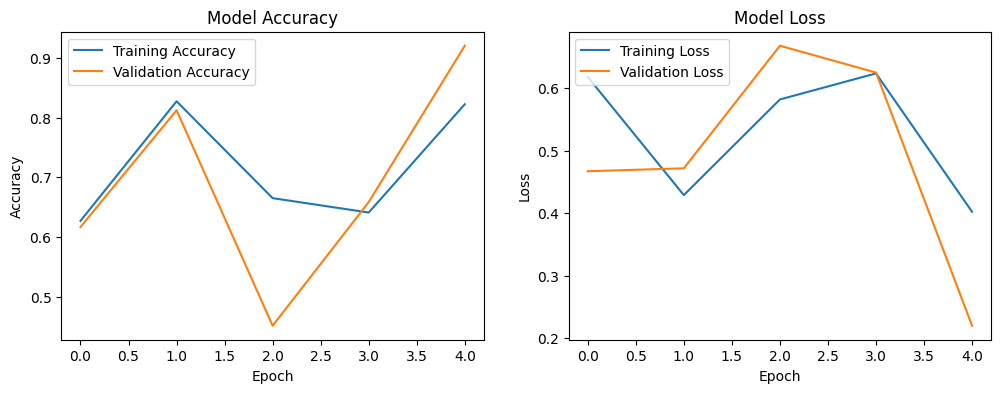

In [10]:
import matplotlib.pyplot as plt

# Assume you've trained your model with the following code
#history = model.fit(X_train_resampled, y_train_resampled, epochs=5, batch_size=32, validation_data=(X_test_pad, y_test))

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()


In [11]:
new_email1 = '''Subject: a meeting to be held tomorrow.

Body:

Dear Raju,

congradulations raju, you have scored 95/100 in the test, therefore we want to give you an oppurtunity to attend a meeting so that you can have a consistent score next time also.
starting from tommorrow, there will be team meetings held every day at 5:00 pm. i would like you to join and get insights on the topics that we will discuss.

I hope this email finds you well.
click on the link to join the meeting on google meet,

https://meet.google.com/
Thank you,

Best regards,
The Sales Team.'''

In [12]:
# Example email text
new_email = "Congratulations! You've won a free ticket to the Bahamas. Claim it now!"

# Step 1: Preprocess the new email
# Tokenize the email
new_email_seq = tokenizer.texts_to_sequences([new_email1])

# Pad the sequence
new_email_pad = pad_sequences(new_email_seq, maxlen=max_sequence_length, padding='post')

# Step 2: Make a prediction
prediction = model.predict(new_email_pad)

# Step 3: Interpret the result
if prediction[0] > 0.5:
    print("Spam")
else:
    print("Ham")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step
Ham


we have a model with good accuracy so we save it.

In [14]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [15]:
# Define the path where you want to save the model in Google Drive
model_save_path = '/content/drive/My Drive/Colab Notebooks/mailspam_model.h5'

# Save the model
model.save(model_save_path)


In [16]:
from tensorflow.keras.models import load_model

# Load the model from Google Drive
loaded_model = load_model('/content/drive/My Drive/Colab Notebooks/mailspam_model.h5')

# Verify that the model has been loaded correctly by checking its summary
loaded_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 100, 128)            │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,461,059 (5.57 MB)

 Trainable params: 1,461,057 (5.57 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [17]:
# Evaluate the model
test_loss, test_acc = loaded_model.evaluate(X_test_pad, y_test, verbose=2)
print(f"Test Accuracy: {test_acc}")

49/49 - 6s - 125ms/step - accuracy: 0.9207 - loss: 0.2202
Test Accuracy: 0.9207473993301392
